In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd /content/drive/MyDrive/Colab Notebooks/std2024/Session07 - 유형별로 실습하는 머신러닝

/content/drive/MyDrive/Colab Notebooks/std2024/Session07 - 유형별로 실습하는 머신러닝


In [9]:
import pandas as pd

In [80]:
featuresData = pd.read_csv("../dataset/feature_regression_example.csv")

#A. 데이터 전처리

### A-1. 타입 통합 / 특성 숫자컬럼 추가

In [12]:
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155
...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412,Y,0,Y,0.421888
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955,N,4,Y,0.421888
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800,N,4,Y,0.352361
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173,N,4,Y,0.352361


In [13]:
strColumns = ["REGIONID",
              "PRODUCTGROUP",
              "PRODUCT",
              "ITEM",
              "HOLIDAY",
              "PROMOTION"
              ]

In [17]:
for i in range(0, len(strColumns)):
  featuresData[ strColumns[i] ] = featuresData[ strColumns[i] ].astype(str)

In [18]:
intColumns = ["YEARWEEK","YEAR", "WEEK", "HCLUS"]
for i in range(0, len(intColumns)):
  featuresData[ intColumns[i] ] = featuresData [ intColumns[i] ].astype(int)

In [19]:
floatColumns = ["QTY","PRO_PERCENT"]
for i in range(0, len(floatColumns)):
  featuresData[ floatColumns[i] ] = featuresData [ floatColumns[i] ].astype(float)

In [20]:
featuresData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY             float64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
dtype: object

In [22]:
from sklearn.preprocessing import LabelEncoder

In [25]:
ynLabelDict = {"Y":1,
               "N":0}

In [32]:
featuresData.HOLIDAY.map(ynLabelDict)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
100   NaN
101   NaN
102   NaN
103   NaN
104   NaN
Name: HOLIDAY, Length: 105, dtype: float64

In [ ]:
featuresData.HOLIDAY.map(ynLabelDict)

In [33]:
featuresData["LE_HOLI"] = featuresData.HOLIDAY.map(ynLabelDict)

In [27]:
featuresData.HOLIDAY

0      SEOUL_BANK_001
1      SEOUL_BANK_001
2      SEOUL_BANK_001
3      SEOUL_BANK_001
4      SEOUL_BANK_001
            ...      
100    SEOUL_BANK_001
101    SEOUL_BANK_001
102    SEOUL_BANK_001
103    SEOUL_BANK_001
104    SEOUL_BANK_001
Name: HOLIDAY, Length: 105, dtype: object

In [12]:
featuresData.HOLIDAY.drop_duplicates()

0    Y
1    N
Name: HOLIDAY, dtype: object

In [13]:
featuresData["REGIONID"] = featuresData["REGIONID"].astype(str)

In [14]:
featuresData["PRODUCTGROUP"] = featuresData["PRODUCTGROUP"].astype(str)

In [15]:
featuresData["PRODUCT"] = featuresData["PRODUCT"].astype(str)

In [16]:
featuresData["ITEM"] = featuresData["ITEM"].astype(str)

In [17]:
featuresData["YEARWEEK"] = featuresData["YEARWEEK"].astype(int)

In [18]:
featuresData["YEAR"] = featuresData["YEAR"].astype(int)

In [19]:
featuresData["WEEK"] = featuresData["WEEK"].astype(int)

In [20]:
featuresData["QTY"] = featuresData["QTY"].astype(float)

In [21]:
featuresData["HOLIDAY"] = featuresData["HOLIDAY"].astype(str)

In [22]:
featuresData["HCLUS"] = featuresData["HCLUS"].astype(int)

In [23]:
featuresData["PROMOTION"] = featuresData["PROMOTION"].astype(str)

In [24]:
featuresData["PRO_PERCENT"] = featuresData["PRO_PERCENT"].astype(float)

In [30]:
import numpy as np

In [26]:
np.where( featuresData.REGIONID =="Y", 1, 0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
np.where( featuresData.HOLIDAY == "Y", 1,0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
featuresData["LE_HOLI"] = np.where( featuresData.HOLIDAY == "Y", 1,0)

In [21]:
from sklearn.preprocessing import LabelEncoder

In [30]:
ynLabelEn = LabelEncoder()

In [31]:
ynLabelEn.fit_transform( featuresData.HOLIDAY )

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [32]:
featuresData["LE_HOLI"] = ynLabelEn.fit_transform( featuresData.HOLIDAY )

In [33]:
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,LE_HOLI
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225.0,Y,1,Y,0.209442,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968.0,N,4,Y,0.209442,0
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209.0,N,4,Y,0.208155,0
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810.0,Y,2,Y,0.208155,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773.0,N,4,Y,0.208155,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412.0,Y,0,Y,0.421888,1
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955.0,N,4,Y,0.421888,0
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800.0,N,4,Y,0.352361,0
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173.0,N,4,Y,0.352361,0


In [34]:
ynLabelEn.inverse_transform( featuresData["LE_HOLI"] )

array(['Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'Y'], dtype=object)

In [35]:
featuresData["LE_HOLI_IN"] = ynLabelEn.inverse_transform( featuresData["LE_HOLI"] )

In [36]:
featuresData.loc[ featuresData.LE_HOLI_IN != featuresData.HOLIDAY]

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,LE_HOLI,LE_HOLI_IN


In [37]:
featuresData = featuresData.drop( columns =["LE_HOLI_IN"] )

In [38]:
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,LE_HOLI
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225.0,Y,1,Y,0.209442,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968.0,N,4,Y,0.209442,0
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209.0,N,4,Y,0.208155,0
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810.0,Y,2,Y,0.208155,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773.0,N,4,Y,0.208155,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412.0,Y,0,Y,0.421888,1
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955.0,N,4,Y,0.421888,0
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800.0,N,4,Y,0.352361,0
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173.0,N,4,Y,0.352361,0


In [39]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.2/755.2 kB 8.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [40]:
pd.read_csv("../dataset/kopo_channel_seasonality_new.csv")

,REGIONID,PRODUCT,YEARWEEK,QTY
0,A60,PRODUCT4,201402,71.0
1,A60,PRODUCT59,201402,22275.0
2,A60,PRODUCT34,201402,4463.0
3,A60,PRODUCT47,201402,0.0
4,A60,PRODUCT56,201402,23.0
...,...,...,...,...
124653,A10,PRODUCT60,201630,824.0
124654,A10,PRODUCT56,201630,275.0
124655,A10,PRODUCT61,201630,0.0
124656,A10,PRODUCT12,201630,15021.0


In [41]:
selloutData = pd.read_csv("../dataset/kopo_channel_seasonality_new.csv")

In [42]:
selloutData

,REGIONID,PRODUCT,YEARWEEK,QTY
0,A60,PRODUCT4,201402,71.0
1,A60,PRODUCT59,201402,22275.0
2,A60,PRODUCT34,201402,4463.0
3,A60,PRODUCT47,201402,0.0
4,A60,PRODUCT56,201402,23.0
...,...,...,...,...
124653,A10,PRODUCT60,201630,824.0
124654,A10,PRODUCT56,201630,275.0
124655,A10,PRODUCT61,201630,0.0
124656,A10,PRODUCT12,201630,15021.0


In [43]:
selloutData.dtypes

REGIONID     object
PRODUCT      object
YEARWEEK      int64
QTY         float64
dtype: object

In [44]:
regionEn = LabelEncoder()

In [45]:
regionEn.fit_transform( selloutData.REGIONID )

array([58, 58, 58, ..., 10, 10, 10])

In [46]:
selloutData["LE_REGIONID"] = regionEn.fit_transform( selloutData.REGIONID )

In [47]:
selloutData

,REGIONID,PRODUCT,YEARWEEK,QTY,LE_REGIONID
0,A60,PRODUCT4,201402,71.0,58
1,A60,PRODUCT59,201402,22275.0,58
2,A60,PRODUCT34,201402,4463.0,58
3,A60,PRODUCT47,201402,0.0,58
4,A60,PRODUCT56,201402,23.0,58
...,...,...,...,...,...
124653,A10,PRODUCT60,201630,824.0,10
124654,A10,PRODUCT56,201630,275.0,10
124655,A10,PRODUCT61,201630,0.0,10
124656,A10,PRODUCT12,201630,15021.0,10


In [48]:
regionEn.classes_

array(['A00', 'A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08',
       'A09', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17',
       'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26',
       'A27', 'A28', 'A29', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36',
       'A37', 'A38', 'A39', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45',
       'A46', 'A47', 'A48', 'A50', 'A51', 'A52', 'A53', 'A54', 'A55',
       'A56', 'A57', 'A58', 'A59', 'A60', 'A61', 'A62', 'A63', 'A64',
       'A65', 'A66', 'A67', 'A68', 'A69', 'A70', 'A77'], dtype=object)

In [49]:
regionEn.inverse_transform( selloutData["LE_REGIONID"] )

array(['A60', 'A60', 'A60', ..., 'A10', 'A10', 'A10'], dtype=object)

In [50]:
customerData = pd.read_csv("../dataset/customerdata.csv")

In [51]:
csidLabel = LabelEncoder()

In [52]:
csidLabel.fit_transform( customerData.CUSTID )

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [53]:
customerData["NEW_CUSTID"] = csidLabel.fit_transform( customerData.CUSTID )

In [54]:
customerData

,CUSTID,AVGPRICE,EMI,DEVICECOUNT,PRODUCTAGE,CUSTTYPE,NEW_CUSTID
0,A13566,4273.900000,3,6,1.679181,Big-Screen-lover,0
1,A14219,3642.441950,2,4,2.682023,Sleeping-dog,1
2,A15312,3653.884565,2,5,3.208202,Sleeping-dog,2
3,A16605,3713.211107,2,6,0.900000,Early-bird,3
4,B10634,3391.074215,2,4,2.453656,Sleeping-dog,4
...,...,...,...,...,...,...,...
145,Z13253,3678.800000,2,5,2.463670,Big-Screen-lover,145
146,Z13534,3662.437527,3,6,0.900000,Early-bird,146
147,Z16428,3516.500000,2,5,2.371301,Big-Screen-lover,147
148,Z16735,3300.100000,2,5,1.704942,Big-Screen-lover,148


In [55]:
csMaster = customerData.loc[ :, ["CUSTID", "NEW_CUSTID"] ]
csMaster

,CUSTID,NEW_CUSTID
0,A13566,0
1,A14219,1
2,A15312,2
3,A16605,3
4,B10634,4
...,...,...
145,Z13253,145
146,Z13534,146
147,Z16428,147
148,Z16735,148


In [56]:
csMaster = customerData.loc[ :, ["CUSTID", "NEW_CUSTID"] ]
csMaster.to_csv("./master.csv")

In [57]:
targetColumn = ["NEW_CUSTID","AVGPRICE","EMI","PRODUCTAGE","CUSTTYPE"]

In [58]:
customerData.loc[ :, targetColumn ]

,NEW_CUSTID,AVGPRICE,EMI,PRODUCTAGE,CUSTTYPE
0,0,4273.900000,3,1.679181,Big-Screen-lover
1,1,3642.441950,2,2.682023,Sleeping-dog
2,2,3653.884565,2,3.208202,Sleeping-dog
3,3,3713.211107,2,0.900000,Early-bird
4,4,3391.074215,2,2.453656,Sleeping-dog
...,...,...,...,...,...
145,145,3678.800000,2,2.463670,Big-Screen-lover
146,146,3662.437527,3,0.900000,Early-bird
147,147,3516.500000,2,2.371301,Big-Screen-lover
148,148,3300.100000,2,1.704942,Big-Screen-lover


In [59]:
csMaster.head(1)

,CUSTID,NEW_CUSTID
0,A13566,0


In [66]:
from sklearn.preprocessing import LabelEncoder

In [4]:
ynLabel = LabelEncoder()

In [11]:
ynHoLabel = LabelEncoder()
ynPrLabel = LabelEncoder()

In [64]:
ynLabel.fit_transform( featuresData.HOLIDAY )

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [65]:
featuresData["LE_HOLI"] = ynHoLabel.fit_transform( featuresData.HOLIDAY )
featuresData["LE_PROMO"] = ynPrLabel.fit_transform( featuresData.PROMOTION )

### A-2. 특성선정 및 데이터분리

In [34]:
featuresData.corr(numeric_only=True)

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,LE_HOLI
YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,NaN
YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,NaN
WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,NaN
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,NaN
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,NaN
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,NaN
LE_HOLI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
featuresData.select_dtypes(np.number)

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,LE_HOLI
0,201501,2015,1,1225.0,1,0.209442,NaN
1,201502,2015,2,968.0,4,0.209442,NaN
2,201503,2015,3,1209.0,4,0.208155,NaN
3,201504,2015,4,1810.0,2,0.208155,NaN
4,201505,2015,5,1773.0,4,0.208155,NaN
...,...,...,...,...,...,...,...
100,201648,2016,48,2412.0,0,0.421888,NaN
101,201649,2016,49,1955.0,4,0.421888,NaN
102,201650,2016,50,1800.0,4,0.352361,NaN
103,201651,2016,51,1173.0,4,0.352361,NaN


In [36]:
featuresData.select_dtypes(np.number).columns

Index(['YEARWEEK', 'YEAR', 'WEEK', 'QTY', 'HCLUS', 'PRO_PERCENT', 'LE_HOLI'], dtype='object')

In [37]:
list( featuresData.select_dtypes(np.number).columns )

['YEARWEEK', 'YEAR', 'WEEK', 'QTY', 'HCLUS', 'PRO_PERCENT', 'LE_HOLI']

In [39]:
label=["QTY"]

In [40]:
set( featuresData.select_dtypes(np.number).columns ) - set(label)

{'HCLUS', 'LE_HOLI', 'PRO_PERCENT', 'WEEK', 'YEAR', 'YEARWEEK'}

In [43]:
features = set( featuresData.select_dtypes(np.number).columns ) - set(label)
features

{'HCLUS', 'LE_HOLI', 'PRO_PERCENT', 'WEEK', 'YEAR', 'YEARWEEK'}

In [44]:
label=["QTY"]

In [45]:
from sklearn.model_selection import train_test_split

In [47]:
train_test_split( featuresData, test_size= 0.2 )

[          REGIONID    PRODUCTGROUP         PRODUCT            ITEM  YEARWEEK  \
 72  SEOUL_BANK_001  SEOUL_BANK_001  SEOUL_BANK_001  SEOUL_BANK_001    201620   
 23  SEOUL_BANK_001  SEOUL_BANK_001  SEOUL_BANK_001  SEOUL_BANK_001    201524   
 21  SEOUL_BANK_001  SEOUL_BANK_001  SEOUL_BANK_001  SEOUL_BANK_001    201522   
 75  SEOUL_BANK_001  SEOUL_BANK_001  SEOUL_BANK_001  SEOUL_BANK_001    201623   
 98  SEOUL_BANK_001  SEOUL_BANK_001  SEOUL_BANK_001  SEOUL_BANK_001    201646   
 ..             ...             ...             ...             ...       ...   
 88  SEOUL_BANK_001  SEOUL_BANK_001  SEOUL_BANK_001  SEOUL_BANK_001    201636   
 48  SEOUL_BANK_001  SEOUL_BANK_001  SEOUL_BANK_001  SEOUL_BANK_001    201549   
 25  SEOUL_BANK_001  SEOUL_BANK_001  SEOUL_BANK_001  SEOUL_BANK_001    201526   
 66  SEOUL_BANK_001  SEOUL_BANK_001  SEOUL_BANK_001  SEOUL_BANK_001    201614   
 59  SEOUL_BANK_001  SEOUL_BANK_001  SEOUL_BANK_001  SEOUL_BANK_001    201607   
 
     YEAR  WEEK     QTY   

In [59]:
train,test = train_test_split( featuresData, test_size= 0.2 )

In [60]:
train

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,LE_HOLI
78,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201626,2016,26,1685.0,SEOUL_BANK_001,1,SEOUL_BANK_001,0.308584,NaN
73,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201621,2016,21,2143.0,SEOUL_BANK_001,1,SEOUL_BANK_001,0.280258,NaN
56,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201604,2016,4,424.0,SEOUL_BANK_001,4,SEOUL_BANK_001,0.237768,NaN
17,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201518,2015,18,526.0,SEOUL_BANK_001,4,SEOUL_BANK_001,0.000000,NaN
59,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201607,2016,7,1552.0,SEOUL_BANK_001,1,SEOUL_BANK_001,0.237768,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201624,2016,24,21.0,SEOUL_BANK_001,4,SEOUL_BANK_001,0.000000,NaN
30,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201531,2015,31,439.0,SEOUL_BANK_001,4,SEOUL_BANK_001,0.000000,NaN
93,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201641,2016,41,2010.0,SEOUL_BANK_001,2,SEOUL_BANK_001,0.280258,NaN
42,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201543,2015,43,572.0,SEOUL_BANK_001,4,SEOUL_BANK_001,0.209442,NaN


In [53]:
print( train.shape )
print( test.shape )

(84, 13)
(21, 13)


In [73]:
features = list( corrDf.loc[ ( abs(corrDf.QTY) > stdRatio) &
            ( corrDf.QTY !=1) ].index )

In [74]:
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,LE_HOLI
0,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201501,2015,1,1225.0,SEOUL_BANK_001,1,SEOUL_BANK_001,0.209442,NaN
1,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201502,2015,2,968.0,SEOUL_BANK_001,4,SEOUL_BANK_001,0.209442,NaN
2,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201503,2015,3,1209.0,SEOUL_BANK_001,4,SEOUL_BANK_001,0.208155,NaN
3,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201504,2015,4,1810.0,SEOUL_BANK_001,2,SEOUL_BANK_001,0.208155,NaN
4,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201505,2015,5,1773.0,SEOUL_BANK_001,4,SEOUL_BANK_001,0.208155,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201648,2016,48,2412.0,SEOUL_BANK_001,0,SEOUL_BANK_001,0.421888,NaN
101,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201649,2016,49,1955.0,SEOUL_BANK_001,4,SEOUL_BANK_001,0.421888,NaN
102,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201650,2016,50,1800.0,SEOUL_BANK_001,4,SEOUL_BANK_001,0.352361,NaN
103,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201651,2016,51,1173.0,SEOUL_BANK_001,4,SEOUL_BANK_001,0.352361,NaN


In [76]:
train_test_split( featuresData.loc[:,features],
                              featuresData.loc[:,label],
                              test_size= 0.2 ,
                               random_state = 10 )

[     HCLUS  PRO_PERCENT
 96       0     0.421888
 68       4     0.209442
 38       4     0.000000
 52       1     0.237768
 74       1     0.280258
 ..     ...          ...
 28       1     0.280258
 64       4     0.209442
 15       4     0.000000
 100      0     0.421888
 9        4     0.000000
 
 [84 rows x 2 columns],
     HCLUS  PRO_PERCENT
 85      4     0.000000
 35      1     0.237768
 48      0     0.357511
 47      0     0.357511
 82      4     0.280258
 42      4     0.209442
 58      4     0.237768
 80      1     0.308584
 3       2     0.208155
 41      2     0.209442
 2       4     0.208155
 26      1     0.280258
 43      4     0.000000
 14      4     0.000000
 60      4     0.237768
 45      0     0.357511
 19      1     0.209442
 1       4     0.209442
 97      0     0.421888
 79      1     0.308584
 71      4     0.000000,
         QTY
 96   1615.0
 68    588.0
 38    980.0
 52   1750.0
 74   2282.0
 ..      ...
 28   2671.0
 64   1707.0
 15    375.0
 100  2412.0
 9

In [77]:
a,b,c,d = train_test_split( featuresData.loc[:,features],
                              featuresData.loc[:,label],
                              test_size= 0.2 ,
                               random_state = 10 )

In [79]:
print(a.shape)
print(b.shape)
print(c.shape)
print(d.shape)

(84, 2)
(21, 2)
(84, 1)
(21, 1)


In [75]:
trainingDataFeatures,\
testDataLabel,\
trainingDataFeatures,\
testDataLabel = train_test_split( featuresData.loc[:,features],
                              featuresData.loc[:,label],
                              test_size= 0.2 ,
                               random_state = 10 )

In [63]:
train,test = train_test_split( featuresData, test_size= 0.2 , random_state = 10 )

In [64]:
train

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,LE_HOLI
96,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201644,2016,44,1615.0,SEOUL_BANK_001,0,SEOUL_BANK_001,0.421888,NaN
68,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201616,2016,16,588.0,SEOUL_BANK_001,4,SEOUL_BANK_001,0.209442,NaN
38,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201539,2015,39,980.0,SEOUL_BANK_001,4,SEOUL_BANK_001,0.000000,NaN
52,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201553,2015,53,1750.0,SEOUL_BANK_001,1,SEOUL_BANK_001,0.237768,NaN
74,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201622,2016,22,2282.0,SEOUL_BANK_001,1,SEOUL_BANK_001,0.280258,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201529,2015,29,2671.0,SEOUL_BANK_001,1,SEOUL_BANK_001,0.280258,NaN
64,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201612,2016,12,1707.0,SEOUL_BANK_001,4,SEOUL_BANK_001,0.209442,NaN
15,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201516,2015,16,375.0,SEOUL_BANK_001,4,SEOUL_BANK_001,0.000000,NaN
100,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,SEOUL_BANK_001,201648,2016,48,2412.0,SEOUL_BANK_001,0,SEOUL_BANK_001,0.421888,NaN


In [68]:
trainingDataFeatures = train.loc[:, features]
trainingDataLabel = train.loc[:, label]
testDataFeatures = test.loc[:, features]
testDataLabel = test.loc[:, label]

TypeError: Passing a set as an indexer is not supported. Use a list instead.

In [71]:
corrDf = featuresData.corr(numeric_only=True)
corrDf

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,LE_HOLI
YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,NaN
YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,NaN
WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,NaN
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,NaN
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,NaN
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,NaN
LE_HOLI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
stdRatio = 0.5

In [68]:
corrDf.loc[ corrDf.QTY> stdRatio ]

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,LE_HOLI,LE_PROMO
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.505932,0.612451
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
LE_HOLI,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
LE_PROMO,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


In [69]:
corrDf.loc[ abs(corrDf.QTY) > stdRatio ]

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,LE_HOLI,LE_PROMO
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.505932,0.612451
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
LE_HOLI,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
LE_PROMO,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


In [70]:
corrDf.loc[ ( abs(corrDf.QTY) > stdRatio) &
            ( corrDf.QTY !=1) ]

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,LE_HOLI,LE_PROMO
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
LE_HOLI,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
LE_PROMO,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


In [71]:
corrDf.loc[ ( abs(corrDf.QTY) > stdRatio) &
            ( corrDf.QTY !=1) ].index

Index(['HCLUS', 'PRO_PERCENT', 'LE_HOLI', 'LE_PROMO'], dtype='object')

In [72]:
features = list( corrDf.loc[ ( abs(corrDf.QTY) > stdRatio) &
            ( corrDf.QTY !=1) ].index )

In [73]:
features

['HCLUS', 'PRO_PERCENT', 'LE_HOLI', 'LE_PROMO']

In [74]:
label = [ "QTY" ]

In [75]:
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,LE_HOLI,LE_PROMO
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225.0,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968.0,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209.0,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810.0,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773.0,N,4,Y,0.208155,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412.0,Y,0,Y,0.421888,1,1
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955.0,N,4,Y,0.421888,0,1
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800.0,N,4,Y,0.352361,0,1
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173.0,N,4,Y,0.352361,0,1


In [76]:
featuresData.shape

(105, 14)

In [77]:
featuresData.shape[0]

105

In [88]:
splitRatio = 0.8

In [89]:
int ( featuresData.shape[0] * splitRatio )

84

In [90]:
stdIndex = int ( featuresData.shape[0] * splitRatio )

In [81]:
sortKey = ["REGIONID", "ITEM", "YEARWEEK"]

In [82]:
featuresData = featuresData.sort_values(by=sortKey).reset_index(drop=True)

In [83]:
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,LE_HOLI,LE_PROMO
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225.0,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968.0,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209.0,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810.0,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773.0,N,4,Y,0.208155,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412.0,Y,0,Y,0.421888,1,1
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955.0,N,4,Y,0.421888,0,1
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800.0,N,4,Y,0.352361,0,1
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173.0,N,4,Y,0.352361,0,1


In [84]:
featuresData.loc[ stdIndex, ["YEARWEEK"] ]

YEARWEEK    201632
Name: 84, dtype: object

In [85]:
featuresData.loc[ stdIndex, ["YEARWEEK"] ].values

array([201632], dtype=object)

In [92]:
stdYearweek = featuresData.loc[ stdIndex, ["YEARWEEK"] ].values[0]
stdYearweek

201632

In [87]:
trainingDataFeatures = featuresData.loc[  featuresData.YEARWEEK <= stdYearweek, features ]
trainingDataFeatures

,HCLUS,PRO_PERCENT,LE_HOLI,LE_PROMO
0,1,0.209442,1,1
1,4,0.209442,0,1
2,4,0.208155,0,1
3,2,0.208155,1,1
4,4,0.208155,0,1
...,...,...,...,...
80,1,0.308584,1,1
81,1,0.308584,1,1
82,4,0.280258,0,1
83,4,0.280258,0,1


In [88]:
trainingDataFeatures = featuresData.loc[  featuresData.YEARWEEK <= stdYearweek, features ]
trainingDataLabel = featuresData.loc[ featuresData.YEARWEEK <= stdYearweek, label ]
trainingDataLabel

,QTY
0,1225.0
1,968.0
2,1209.0
3,1810.0
4,1773.0
...,...
80,1616.0
81,1318.0
82,2240.0
83,1522.0


In [89]:
trainingDataFeatures = featuresData.loc[  featuresData.YEARWEEK <= stdYearweek, features ]
trainingDataLabel = featuresData.loc[ featuresData.YEARWEEK <= stdYearweek, label ]
testDataFeatures = featuresData.loc[ featuresData.YEARWEEK > stdYearweek, features ]
testDataFeatures

,HCLUS,PRO_PERCENT,LE_HOLI,LE_PROMO
85,4,0.000000,0,0
86,1,0.308584,1,1
87,1,0.308584,1,1
88,1,0.308584,1,1
89,4,0.308584,0,1
90,4,0.308584,0,1
91,4,0.280258,0,1
92,4,0.280258,0,1
93,2,0.280258,1,1
94,4,0.280258,0,1


In [90]:
trainingDataFeatures = featuresData.loc[  featuresData.YEARWEEK <= stdYearweek, features ]
trainingDataLabel = featuresData.loc[ featuresData.YEARWEEK <= stdYearweek, label ]
testDataFeatures = featuresData.loc[ featuresData.YEARWEEK > stdYearweek, features ]
testDataLabel = featuresData.loc[ featuresData.YEARWEEK > stdYearweek, label ]
testDataLabel

,QTY
85,43.0
86,1700.0
87,1514.0
88,1501.0
89,1491.0
90,806.0
91,2111.0
92,2400.0
93,2010.0
94,1900.0


In [93]:
trainingDataFeatures = featuresData.loc[  featuresData.YEARWEEK <= stdYearweek, features ]
trainingDataLabel = featuresData.loc[ featuresData.YEARWEEK <= stdYearweek, label ]
testDataFeatures = featuresData.loc[ featuresData.YEARWEEK > stdYearweek, features ]
testDataLabel = featuresData.loc[ featuresData.YEARWEEK > stdYearweek, label ]

In [92]:
print(trainingDataFeatures.shape)
print(trainingDataLabel.shape)
print(testDataFeatures.shape)
print(testDataLabel.shape)

(85, 4)
(85, 1)
(20, 4)
(20, 1)


#B.모델적용

### B-3.모델 적용

In [83]:
from sklearn import tree
from sklearn import ensemble

In [84]:
# model: DecisionTree
modelDt = tree.DecisionTreeRegressor()
# model: RandomForest
modelRf = ensemble.RandomForestRegressor()

In [94]:
# model: DecisionTree
modelDt = tree.DecisionTreeRegressor(random_state=10)
# model: RandomForest
modelRf = ensemble.RandomForestRegressor(random_state=10)

In [95]:
fittedDtModel = modelDt.fit(X = trainingDataFeatures,
              y = trainingDataLabel )
fittedRfModel = modelRf.fit(X = trainingDataFeatures,
              y = trainingDataLabel )

<ipython-input-95-1e1d05aa7867>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fittedRfModel = modelRf.fit(X = trainingDataFeatures,


#C.예측

### C-4.예측 및 검증

In [96]:
predictValue = fittedDtModel.predict(X=testDataFeatures)

In [97]:
predictValueRf = fittedRfModel.predict(X=testDataFeatures)

In [98]:
testDataLabel["PREDICT_DT"] = predictValue

In [99]:
testDataLabel["PREDICT_RF"] = predictValueRf

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [103]:
mean_absolute_percentage_error( y_true= testDataLabel["QTY"],
                                y_pred = testDataLabel["PREDICT_DT"])

0.9316786720855192

In [105]:
mean_absolute_error( y_true= testDataLabel["QTY"],
                                y_pred = testDataLabel["PREDICT_RF"])

399.49408121601266

In [104]:
mean_absolute_error( y_true= testDataLabel["QTY"],
                                y_pred = testDataLabel["PREDICT_DT"])

462.0403571428572

In [100]:
testDataLabel

,QTY,PREDICT_DT,PREDICT_RF
85,43,350.714286,353.535465
86,1700,1434.600000,1409.048303
87,1514,1434.600000,1409.048303
88,1501,1434.600000,1409.048303
89,1491,1434.600000,1446.453008
90,806,1434.600000,1446.453008
91,2111,1708.750000,1731.856825
92,2400,1708.750000,1731.856825
93,2010,2620.428571,2568.961483
94,1900,1708.750000,1731.856825


In [97]:
fittedDtModel.predict(X=testDataFeatures)

array([ 350.71428571, 1434.6       , 1434.6       , 1434.6       ,
       1434.6       , 1434.6       , 1708.75      , 1708.75      ,
       2620.42857143, 1708.75      ,  350.71428571, 2193.8       ,
       2193.8       , 2193.8       , 2193.8       , 2193.8       ,
       1434.6       , 1434.6       , 1434.6       , 1434.6       ])

In [98]:
predictValue = fittedDtModel.predict(X=testDataFeatures)

In [99]:
testDataLabel

,QTY
85,43.0
86,1700.0
87,1514.0
88,1501.0
89,1491.0
90,806.0
91,2111.0
92,2400.0
93,2010.0
94,1900.0


In [100]:
testDataLabel["PREDICT_DT"] = 1
testDataLabel

,QTY,PREDICT_DT
85,43.0,1
86,1700.0,1
87,1514.0,1
88,1501.0,1
89,1491.0,1
90,806.0,1
91,2111.0,1
92,2400.0,1
93,2010.0,1
94,1900.0,1


In [101]:
testDataLabel["PREDICT_DT"] = predictValue
testDataLabel

,QTY,PREDICT_DT
85,43.0,350.714286
86,1700.0,1434.600000
87,1514.0,1434.600000
88,1501.0,1434.600000
89,1491.0,1434.600000
90,806.0,1434.600000
91,2111.0,1708.750000
92,2400.0,1708.750000
93,2010.0,2620.428571
94,1900.0,1708.750000


In [128]:
features

['HCLUS', 'PRO_PERCENT', 'LE_HOLI', 'LE_PROMO']

In [159]:
inputHClus = 1 #대휴일
inputProPercent = 0.4
inputHoliday = 1
inputPromotion = 1

In [160]:
inputData = pd.DataFrame( [[inputHClus, inputProPercent, inputHoliday, inputPromotion]])

In [161]:
inputData

,0,1,2,3
0,1,0.4,1,1


In [106]:
result = fittedDtModel.predict(inputData)
result

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([1434.6])

In [107]:
result = fittedDtModel.predict(inputData)
result[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


1434.6

In [108]:
import pickle

In [109]:
with open("./midtcore.dump", "wb") as fw:
  pickle.dump(fittedDtModel, fw)

In [110]:
pwd

'/content/drive/MyDrive/Colab Notebooks/std2024/Session07 - 유형별로 실습하는 머신러닝'

In [147]:
from sklearn.tree import plot_tree

In [148]:
import matplotlib.pyplot as plt

[Text(0.5394736842105263, 0.9285714285714286, 'x[1] <= 0.259\nsquared_error = 673183.868\nsamples = 85\nvalue = 1131.729'),
 Text(0.2894736842105263, 0.7857142857142857, 'x[3] <= 0.5\nsquared_error = 290887.662\nsamples = 64\nvalue = 826.203'),
 Text(0.15789473684210525, 0.6428571428571429, 'x[0] <= 3.0\nsquared_error = 74598.945\nsamples = 23\nvalue = 335.522'),
 Text(0.10526315789473684, 0.5, 'x[0] <= 1.5\nsquared_error = 25921.0\nsamples = 2\nvalue = 176.0'),
 Text(0.05263157894736842, 0.35714285714285715, 'squared_error = 0.0\nsamples = 1\nvalue = 337.0'),
 Text(0.15789473684210525, 0.35714285714285715, 'squared_error = 0.0\nsamples = 1\nvalue = 15.0'),
 Text(0.21052631578947367, 0.5, 'squared_error = 76580.585\nsamples = 21\nvalue = 350.714'),
 Text(0.42105263157894735, 0.6428571428571429, 'x[0] <= 3.0\nsquared_error = 201387.029\nsamples = 41\nvalue = 1101.463'),
 Text(0.3157894736842105, 0.5, 'x[1] <= 0.224\nsquared_error = 165625.976\nsamples = 13\nvalue = 1398.154'),
 Text(0.2

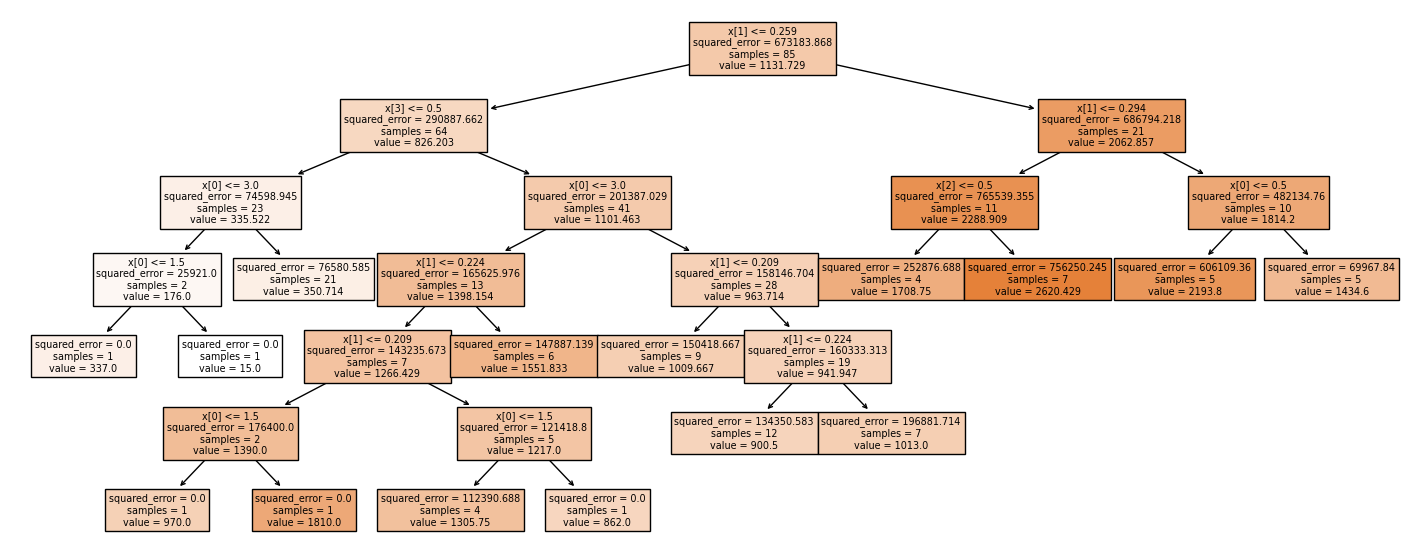

In [149]:
plt.figure(figsize= (18,7))
plot_tree(fittedDtModel, filled=True)

In [150]:
trainingDataFeatures

,HCLUS,PRO_PERCENT,LE_HOLI,LE_PROMO
0,1,0.209442,1,1
1,4,0.209442,0,1
2,4,0.208155,0,1
3,2,0.208155,1,1
4,4,0.208155,0,1
...,...,...,...,...
80,1,0.308584,1,1
81,1,0.308584,1,1
82,4,0.280258,0,1
83,4,0.280258,0,1


In [151]:
trainingDataFeatures.loc[ trainingDataFeatures.PRO_PERCENT <= 0.259 ]

,HCLUS,PRO_PERCENT,LE_HOLI,LE_PROMO
0,1,0.209442,1,1
1,4,0.209442,0,1
2,4,0.208155,0,1
3,2,0.208155,1,1
4,4,0.208155,0,1
...,...,...,...,...
68,4,0.209442,0,1
69,4,0.209442,0,1
70,4,0.000000,0,0
71,4,0.000000,0,0


In [152]:
trainingDataFeatures.loc[ trainingDataFeatures.PRO_PERCENT <= 0.259 ].shape

(64, 4)

In [162]:
step1 = trainingDataFeatures.loc[ trainingDataFeatures.PRO_PERCENT <= 0.259 ].shape

In [5]:
ynLabel.fit( ["Y"] )

LabelEncoder()

In [6]:
ynLabel.fit( [["Y"]] )

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [165]:
inputHClus = 0 #대휴일
inputProPercent = 0
inputHoliday = 0
inputPromotion = 0

In [166]:
inputData = pd.DataFrame( [[inputHClus, inputProPercent, inputHoliday, inputPromotion]])

In [167]:
inputData

,0,1,2,3
0,0,0,0,0


In [170]:
step1.loc[step1.LE_PROMO <= 0.5 ]

,HCLUS,PRO_PERCENT,LE_HOLI,LE_PROMO
9,4,0.0,0,0
14,4,0.0,0,0
15,4,0.0,0,0
16,4,0.0,0,0
17,4,0.0,0,0
18,4,0.0,0,0
23,4,0.0,0,0
24,1,0.0,1,0
29,4,0.0,0,0
30,4,0.0,0,0


In [171]:
step1.loc[ step1.LE_PROMO <= 0.5 ].shape

(23, 4)

In [172]:
step2 = step1.loc[ step1.LE_PROMO <= 0.5 ]

In [173]:
step2.loc[ step2.HCLUS <= 3.0]

,HCLUS,PRO_PERCENT,LE_HOLI,LE_PROMO
24,1,0.0,1,0
55,2,0.0,1,0


In [174]:
step3 = step2.loc[ step2.HCLUS <= 3.0]

In [175]:
finalStep = step3.loc[ step3.HCLUS <= 1.5 ]

In [176]:
finalStep

,HCLUS,PRO_PERCENT,LE_HOLI,LE_PROMO
24,1,0.0,1,0


In [158]:
trainingDataLabel.loc[24]

QTY    337.0
Name: 24, dtype: float64